<a href="https://colab.research.google.com/github/kausar-vento/PCVK_Genap_2023/blob/main/Minggu%208(UTS)/Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [13]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Mean

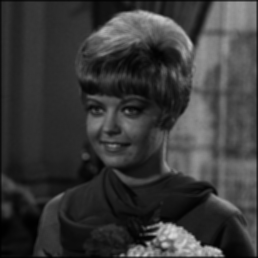

In [16]:
def convolution2d(image, kernel, stride, padding) :
  # Add padding to the image
  padded_image = np.pad(image, ((padding,padding), (padding,padding)), mode='constant')

  # Get the dimensions of the kernel and the padded image
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = padded_image.shape

  # Calculate the dimensions of the output image
  output_height = int(((padded_height - kernel_height) / stride) + 1)
  output_width = int(((padded_width - kernel_width) / stride) + 1)

  # Create an empty output image
  output_image = np.zeros((output_height, output_width), dtype=np.float32)

  # Iterate over the image with the given stride
  for y in range(0, padded_height - kernel_height + 1, stride) :
    for x in range(0, padded_width - kernel_width + 1, stride) :
      # Extract the patch of the image that overlaps with the kernel
      patch = padded_image[y:y+kernel_height, x:x+kernel_width]

      # Compute the dot product between the patch and the kernel
      convolution = np.sum(patch * kernel)

      # Set the value of the output pixel at this location
      output_y = int(y / stride)
      output_x = int(x / stride)
      output_image[output_y, output_x] = convolution

  return output_image

kernel_mean = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

result_mean = convolution2d(img_gray, kernel_mean, 1, 2)
cv2_imshow(result_mean)

# Modus

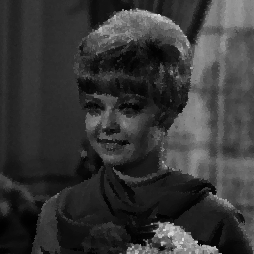

In [18]:
def mode_filter(image, kernel_size):
    height, width = image.shape
    kernel_height, kernel_width = kernel_size, kernel_size
    output_height = height - kernel_height + 1
    output_width = width - kernel_width + 1

    output_image = np.zeros((output_height, output_width), dtype=image.dtype)

    for y in range(output_height):
        for x in range(output_width):
            kernel = image[y:y+kernel_height, x:x+kernel_width].flatten()
            output_image[y, x] = np.bincount(kernel).argmax()

    output_image = output_image.astype(image.dtype)

    return output_image

kernel_size = 3
result = mode_filter(img_gray, kernel_size)

cv2_imshow(result)


# Median